In [31]:

# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)


from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


scipy: 1.0.0
numpy: 1.14.0
matplotlib: 2.1.2
pandas: 0.22.0
sklearn: 0.19.1
statsmodels: 0.8.0


In [2]:
# Wczytanie danych z pliku csv z uwzglednieniem kolumny z datą/czasem
data = pandas.read_csv('/home/pawelglica/Documents/magisterka/sales_org.csv',sep=';', parse_dates=['CLOSEDATETIME'], index_col='CLOSEDATETIME')

In [26]:
import pandas as pd
# Funkcja wyszukująca braki danych
def missing_values_table(df):
        # Całowita ilość brakujacych danych
        mis_val = df.isnull().sum()
        
        # Procent brakujacych danych
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Tworzenie tabeli z wynikami
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Zmiana nazwy kolumn
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Brakujących wartości', 1 : '% całkowitej ilości'})
        
        # Sortowanie wyników malejąco
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% całkowitej ilości', ascending=False).round(1)
        
        # Wyswietlanie informacji
        print ("Wybrana ramka danych posiada " + str(df.shape[1]) + " kolumn/y.\n"      
            "Są w niej " + str(mis_val_table_ren_columns.shape[0]) +
              " kolumn/y z brakującymi wartościami .")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [27]:
missing_values_table(data)

Wybrana ramka danych posiada 4 kolumn/y.
Są w niej 1 kolumn/y z brakującymi wartościami .


Brakujących wartości  % całkowitej ilości
ORDERTYPEID                     1                  0.0

In [28]:
# Znajdz kolumny z ilościa brakujacych wartosci wiekszą niz 50%
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% całkowitej ilości'] > 50].index)
print('Usunięte zostanie/ą %d kolumn/y.' % len(missing_columns))

Wybrana ramka danych posiada 4 kolumn/y.
Są w niej 1 kolumn/y z brakującymi wartościami .
Usunięte zostanie/ą 0 kolumn/y.


In [ ]:
# Usuniecie kolumn z szeregu danych  
data = data.drop(columns = list(missing_columns))

In [6]:
# Display top of dataframe
data.head()

LOCATIONID  REVENUECENTERID  ORDERTYPEID  CHECKTOTAL
CLOSEDATETIME                                                            
2016-09-01 09:01:37       10041           185726     185937.0       16.46
2016-09-01 09:03:23       10041           185726     185937.0        8.95
2016-09-01 09:04:28       10041           185726     185937.0       17.95
2016-09-01 09:07:28       10041           185726     185937.0       14.95
2016-09-01 09:15:24       10041           185726     185937.0        5.95

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511551 entries, 2016-09-01 09:01:37 to 2018-02-28 22:46:44
Data columns (total 4 columns):
LOCATIONID         1511551 non-null int64
REVENUECENTERID    1511551 non-null int64
ORDERTYPEID        1511550 non-null float64
CHECKTOTAL         1511551 non-null float64
dtypes: float64(2), int64(2)
memory usage: 57.7 MB


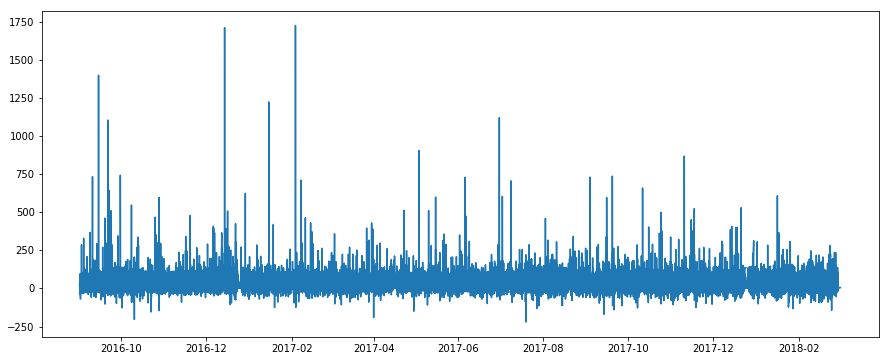

In [32]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
ts = data['CHECKTOTAL']
plt.plot(ts['2016-09-01':])

In [10]:
# Wczytanie szeregu danych
ts = data['CHECKTOTAL']
# Grupowanie dziennych dnych w pojedynczy rekord oraz
# podział na zestawy: cały, trening i test
all = ts['2016-09-01':'2018-02-28'].resample('D').sum()
train = ts['2016-09-01':'2017-09-01'].resample('D').sum()
test = ts['2017-09-02':'2018-02-28'].resample('D').sum()

In [8]:
# Wygląd danych po grupowaniu
all.head()

CLOSEDATETIME
2016-09-01    47117.80
2016-09-02    42481.88
2016-09-03    55407.60
2016-09-04    59011.09
2016-09-05    33062.29
Freq: D, Name: CHECKTOTAL, dtype: float64

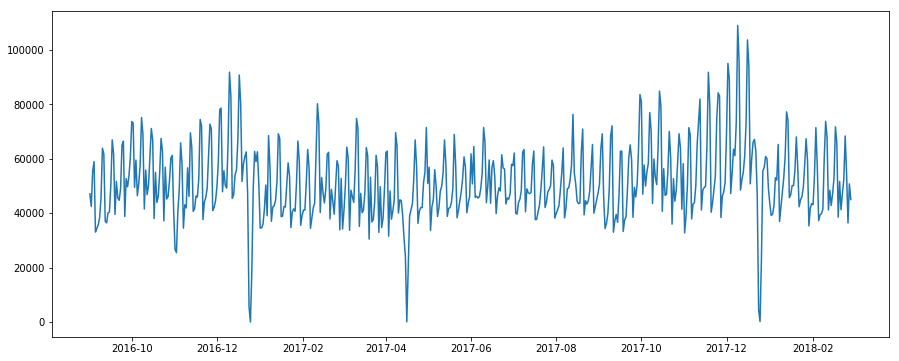

In [7]:
# Granulacja i pozimy danych po zgrupowaniu
plt.plot(all)

In [11]:
from statsmodels.tsa.stattools import adfuller
from pandas.core import datetools
import pandas as pd
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/home/pawelglica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  import sys
/home/pawelglica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


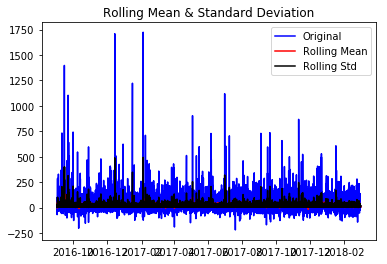

Results of Dickey-Fuller Test:


In [ ]:
test_stationarity(ts['2016-09-01':])

/home/pawelglica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/pawelglica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


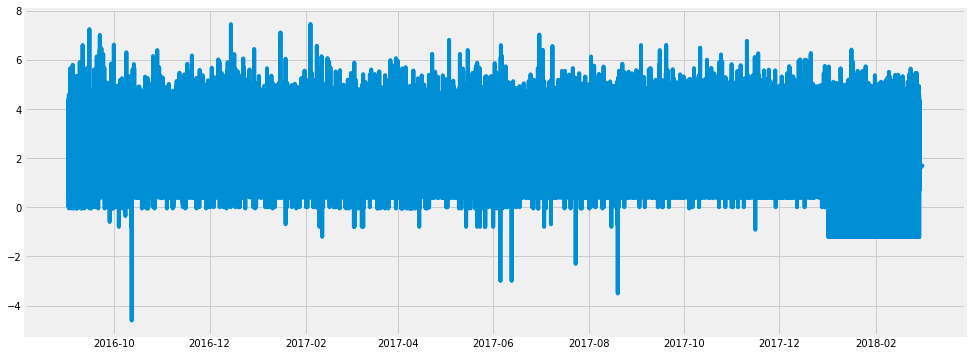

In [38]:
ts_log = np.log(ts['2016-09-01':])
plt.plot(ts_log)

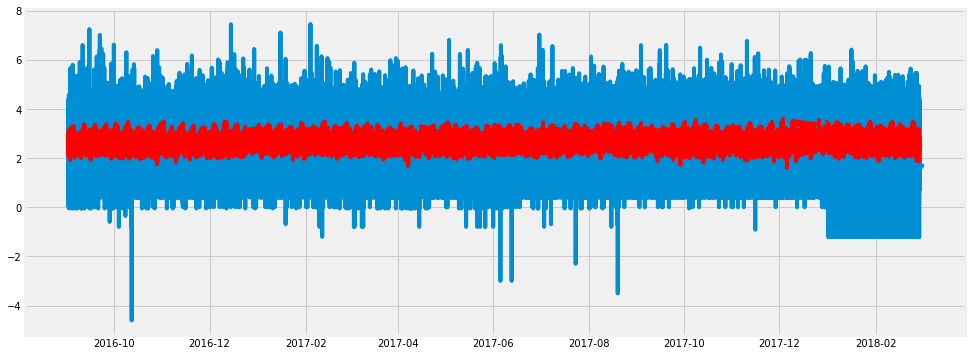

In [41]:
#moving_avg = pd.rolling_mean(ts_log,12)
moving_avg = ts_log.rolling(window=30, center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [42]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(30)

CLOSEDATETIME
2016-09-01 09:01:37         NaN
2016-09-01 09:03:23         NaN
2016-09-01 09:04:28         NaN
2016-09-01 09:07:28         NaN
2016-09-01 09:15:24         NaN
2016-09-01 09:18:51         NaN
2016-09-01 09:22:34         NaN
2016-09-01 09:24:59         NaN
2016-09-01 09:55:40         NaN
2016-09-01 09:57:48         NaN
2016-09-01 09:59:05         NaN
2016-09-01 09:45:54         NaN
2016-09-01 09:46:53         NaN
2016-09-01 09:48:15         NaN
2016-09-01 09:51:27         NaN
2016-09-01 09:52:32         NaN
2016-09-01 09:53:04         NaN
2016-09-01 09:54:18         NaN
2016-09-01 10:00:24         NaN
2016-09-01 10:01:25         NaN
2016-09-01 10:03:38         NaN
2016-09-01 10:08:26         NaN
2016-09-01 10:10:27         NaN
2016-09-01 10:12:11         NaN
2016-09-01 10:13:06         NaN
2016-09-01 10:14:25         NaN
2016-09-01 10:14:53         NaN
2016-09-01 10:25:44         NaN
2016-09-01 10:25:48         NaN
2016-09-01 10:15:18   -0.767057
Name: CHECKTOTAL, dtype: f

In [6]:
#for col in data.columns:
#    if data[col].dtype == 'object':
#        try:
#            data[col] = pd.to_datetime(data[col])
#        except ValueError:
#            pass
#data.info()
#data['date'] = data['CLOSEDATETIME'].dt.date
#data['time'] = data['CLOSEDATETIME'].dt.time
#print(data['date'],data['time'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511551 entries, 0 to 1511550
Data columns (total 5 columns):
LOCATIONID         1511551 non-null int64
REVENUECENTERID    1511551 non-null int64
ORDERTYPEID        1511550 non-null float64
CLOSEDATETIME      1511550 non-null datetime64[ns]
CHECKTOTAL         1511551 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 57.7 MB
0          2016-09-01
1          2016-09-01
2          2016-09-01
3          2016-09-01
4          2016-09-01
5          2016-09-01
6          2016-09-01
7          2016-09-01
8          2016-09-01
9          2016-09-01
10         2016-09-01
11         2016-09-01
12         2016-09-01
13         2016-09-01
14         2016-09-01
15         2016-09-01
16         2016-09-01
17         2016-09-01
18         2016-09-01
19         2016-09-01
20         2016-09-01
21         2016-09-01
22         2016-09-01
23         2016-09-01
24         2016-09-01
25         2016-09-01
26         2016-09-01
2

In [ ]:
import matplotlib.pyplot as plt

# Rename the score 
#data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['CLOSEDATETIME']);
plt.xlabel('Time/date'); plt.ylabel('Sales'); 
plt.title('Sales in time');
plt.show()